In [ ]:
As expected, there is a strong relationship between latitude and temperature. Around the equator area, the temperature is 
high while it is decreasing as it moves to both poles. 
One interesting about the all four graphs is that more cities existed in the northern hemisphere than that of in the southern hemisphere. Cities are located even close to the 
artic area but not around the antarctic area. No relationship between cloudiness and latitude. 
According to the wind speed and latitude, however, most wind speed is between 0 to 40 miles per hour. However, as the distance is farter 
from the equators, the wind speed tends to increase either. 

In [1]:
#Python library for cities across the world
!pip install citipy

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
#from api_keys import api_key

api_key = "0046e41b632c9fb8c1b5de2295374767"

# List for holding lat_lngs and cities
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

In [2]:
# Randomly generate cities from 1500 cities for each lat, lon combination
for x in range(1500):
    lat, lon =np.random.uniform(low=-90.00, high=90.00), np.random.uniform(low=-180.00, high=180.00) 
    city = citipy.nearest_city(lat, lon)
    cities_df = cities_df.append({"City": city.city_name, "Country": city.country_code,}, ignore_index=True)
       
#Remove if city is not unique
cities_df = cities_df.drop_duplicates(subset='City').reset_index()

# Print the city count to confirm sufficient count
cities_df.count()

index      574
City       574
Country    574
dtype: int64

In [3]:
#Create a df file for storing data from the API calls
column_names = ["City", "Country", "Latitude", "Longitude", "Date", "Cloudiness", "Humidity", "Max Temp", "Wind Speed"]
new_data_cities_df = pd.DataFrame(columns=column_names)

#Loop through the list of cities and add the data to the df
base_url = "https://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")

#Counter
row_count = 1

for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = base_url + "appid=" + api_key + "&q=" + target_city + "&units=imperial"
    selected_cities = requests.get(target_url).json()
    
    if selected_cities["cod"] == "404":
        print("City not found. Skipping...")
    else:
        new_data_cities_df.set_value(index, "City", selected_cities ["name"])
        new_data_cities_df.set_value(index, "Country", selected_cities ["sys"]["country"])
        new_data_cities_df.set_value(index, "Cloudiness", selected_cities ["clouds"]["all"])
        new_data_cities_df.set_value(index, "Date", selected_cities ["dt"])
        new_data_cities_df.set_value(index, "Humidity", selected_cities ["main"]["humidity"])
        new_data_cities_df.set_value(index, "Latitude", selected_cities ["coord"]["lat"])
        new_data_cities_df.set_value(index, "Longitude", selected_cities ["coord"]["lon"])
        new_data_cities_df.set_value(index, "Max Temp", selected_cities ["main"]["temp_max"])
        new_data_cities_df.set_value(index, "Wind Speed", selected_cities ["wind"]["speed"])  
        
        print("--------------------------")
        print("Processing Record # ", row_count, "|", selected_cities ["name"])
        row_count += 1   

Beginning Data Retrieval


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

--------------------------
Processing Record #  1 | Ambilobe
--------------------------
Processing Record #  2 | Ushuaia
--------------------------
Processing Record #  3 | Teknaf
--------------------------
Processing Record #  4 | Laguna
--------------------------
Processing Record #  5 | Bethel
--------------------------
Processing Record #  6 | Coquimbo
--------------------------
Processing Record #  7 | Abu Dhabi
--------------------------
Processing Record #  8 | Marsa Matruh
--------------------------
Processing Record #  9 | Dingle
--------------------------
Processing Record #  10 | Yellowknife
--------------------------
Processing Record #  11 | Port Elizabeth
--------------------------
Processing Record #  12 | Manacapuru
--------------------------
Processing Record #  13 | Busselton
--------------------------
Processing Record #  14 | Gizo
City not found. Skipping...
--------------------------
Processing Record #  15 | Jalu
--------------------------
Processing Record #  16 

--------------------------
Processing Record #  128 | Saint Anthony
--------------------------
Processing Record #  129 | Ust-Maya
--------------------------
Processing Record #  130 | Oktyabrskoye
--------------------------
Processing Record #  131 | Lahij
--------------------------
Processing Record #  132 | Berkak
City not found. Skipping...
--------------------------
Processing Record #  133 | Ridgecrest
--------------------------
Processing Record #  134 | Guerrero Negro
--------------------------
Processing Record #  135 | Abu Samrah
--------------------------
Processing Record #  136 | Namibe
--------------------------
Processing Record #  137 | Dalkola
--------------------------
Processing Record #  138 | Kruisfontein
--------------------------
Processing Record #  139 | Yuzhno-Kurilsk
--------------------------
Processing Record #  140 | Agustin Codazzi
--------------------------
Processing Record #  141 | Ayr
--------------------------
Processing Record #  142 | Torbay
------

--------------------------
Processing Record #  251 | Coihaique
--------------------------
Processing Record #  252 | Bayir
--------------------------
Processing Record #  253 | Shimoda
--------------------------
Processing Record #  254 | Adrar
--------------------------
Processing Record #  255 | Honningsvag
--------------------------
Processing Record #  256 | Neuquen
--------------------------
Processing Record #  257 | Lavrentiya
--------------------------
Processing Record #  258 | Kirkkonummi
--------------------------
Processing Record #  259 | Evensk
--------------------------
Processing Record #  260 | Douglas
--------------------------
Processing Record #  261 | Kavieng
--------------------------
Processing Record #  262 | Napa
--------------------------
Processing Record #  263 | Sao Joao da Barra
--------------------------
Processing Record #  264 | Chapais
--------------------------
Processing Record #  265 | San Patricio
--------------------------
Processing Record #  26

--------------------------
Processing Record #  377 | Outjo
--------------------------
Processing Record #  378 | Usinsk
--------------------------
Processing Record #  379 | Vagur
City not found. Skipping...
--------------------------
Processing Record #  380 | Talnakh
--------------------------
Processing Record #  381 | Katsuura
--------------------------
Processing Record #  382 | Kavaratti
--------------------------
Processing Record #  383 | Geraldton
--------------------------
Processing Record #  384 | Sulangan
--------------------------
Processing Record #  385 | Kearney
--------------------------
Processing Record #  386 | Mariana
--------------------------
Processing Record #  387 | Khudumelapye
--------------------------
Processing Record #  388 | Tayu
--------------------------
Processing Record #  389 | Moroni
--------------------------
Processing Record #  390 | Zhengjiatun
--------------------------
Processing Record #  391 | Crotone
--------------------------
Processin

City not found. Skipping...
--------------------------
Processing Record #  501 | Mahon
--------------------------
Processing Record #  502 | Hun
--------------------------
Processing Record #  503 | Zeewolde
--------------------------
Processing Record #  504 | Bara
--------------------------
Processing Record #  505 | Zabol
--------------------------
Processing Record #  506 | Raudeberg
--------------------------
Processing Record #  507 | Siavonga
--------------------------
Processing Record #  508 | Jardim
--------------------------
Processing Record #  509 | Mao
--------------------------
Processing Record #  510 | Mogadishu
--------------------------
Processing Record #  511 | Lazaro Cardenas
--------------------------
Processing Record #  512 | San Quintin
--------------------------
Processing Record #  513 | Aitape
--------------------------
Processing Record #  514 | Bud
--------------------------
Processing Record #  515 | Oleksandrivka
--------------------------
Processing R

In [4]:
new_data_cities_df.count()

City          520
Country       520
Latitude      520
Longitude     520
Date          520
Cloudiness    520
Humidity      520
Max Temp      520
Wind Speed    520
dtype: int64

In [5]:
#Reset the index
new_data_cities_df = new_data_cities_df.reset_index()
del new_data_cities_df['index']
new_data_cities_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Ambilobe,MG,-13.19,49.05,1551929921,92,99,70.24,4.07
1,Ushuaia,AR,-54.81,-68.31,1551927600,75,99,41,29.97
2,Teknaf,BD,20.86,92.31,1551929922,56,96,72.04,2.95
3,Laguna,MX,27.52,-110.01,1551929838,36,57,68.98,2.28
4,Bethel,US,60.79,-161.76,1551927360,90,87,32,8.05


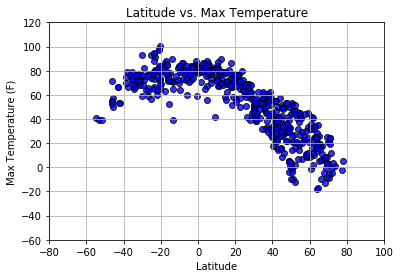

NameError: name 'Lat_Temp' is not defined

In [12]:
#Latitude vs. Max Temperature Plot
plt.scatter(new_data_cities_df["Latitude"], new_data_cities_df["Max Temp"], 
            color='blue', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="City")

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60,120])
plt.show()
plt.savefig(Lat_Temp.png)

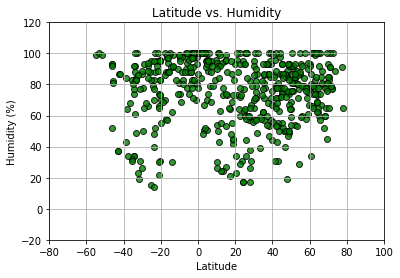

NameError: name 'Lat_Humid' is not defined

In [11]:
#Latitude vs. Humidity Plot
plt.scatter(new_data_cities_df["Latitude"], new_data_cities_df["Humidity"], 
            color='green', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="City")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20,120])
plt.show()
plt.savefig(Lat_Humid.png)

In [ ]:
There is no relationship between latitude and humidity.

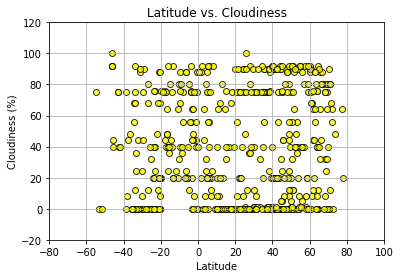

NameError: name 'Lat_cloud' is not defined

In [13]:
#Latitude vs. Cloudiness Plot
plt.scatter(new_data_cities_df["Latitude"], new_data_cities_df["Cloudiness"], 
            color='yellow', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="City")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20,120])
plt.show()
plt.savefig(Lat_cloud.png)

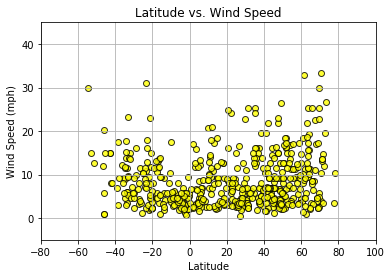

NameError: name 'Lat_Windspeed' is not defined

In [14]:
#Latitude vs. Wind Speed Plot
plt.scatter(new_data_cities_df["Latitude"], new_data_cities_df["Wind Speed"], 
            color='yellow', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="City")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 45])
plt.show()
plt.savefig(Lat_Windspeed.png)